# Volume/Height relationship in wells with square cross-section

The width of the well at the bottom is 2.67 mm. and at the top (height, $H$, of 11.43 mm.) is
3.63 mm.

At a height, $H$, the cross section is a square of size $2.67 + (3.63 - 2.67)H/11.43$ mm.

In [1]:
using Polynomials, DataFrames, Gadfly
plen = Poly([2.67, 0.96 / 11.43])  # polynomial representing size of square

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /home/bates/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


Poly(2.67 + 0.08398950131233596*x)

In [2]:
parea = plen * plen

Poly(7.1289 + 0.448503937007874*x + 0.007054236330694883*x^2)

The volume will be the integral from $0$ to $H$ of `parea`

In [3]:
pvol = polyint(parea)

Poly(7.1289*x + 0.224251968503937*x^2 + 0.002351412110231628*x^3)

A plot of this function is

In [4]:
H = 0.:0.01:11.43;
d = DataFrame(H=H);
d[:V] = polyval(pvol,d[:H]);
first(d, 6)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[4]:4
└ @ Core In[4]:4


,H,V
,Float64,Float64
1,0.0,0.0
2,0.01,0.0713114
3,0.02,0.142668
4,0.03,0.214069
5,0.04,0.285515
6,0.05,0.357006


In [5]:
last(d, 6)

,H,V
,Float64,Float64
1,11.38,113.634
2,11.39,113.765
3,11.4,113.897
4,11.41,114.029
5,11.42,114.16
6,11.43,114.292


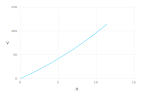

In [6]:
plot(d,x="H",y="V",Geom.line)

In [7]:
real(roots(pvol - 10.)[1])

-48.357046148247086

In [8]:
real(roots(pvol -12.)[1])

-48.48516975908005

In [9]:
real(roots(pvol - 20.)[1])

-48.97899098468442

## Calculations for a cylindrical well

The cylindrical wells have a depth of 11.47 mm and a diameter (top/bottom) of 5.0/4.5 mm., corresponding to a radius of 2.5/2.25 mm.

The radius $r$ at a height $H$ will be $2.25 + (0.25)*H/11.47$ mm

In [10]:
pradius = Poly([2.25, (0.25)/(11.47)])

Poly(2.25 + 0.021795989537925022*x)

Just to make sure that I got that right.

In [11]:
polyval(pradius,[0.,11.47])

2-element Array{Float64,1}:
 2.25
 2.5 

In [12]:
parea = π * pradius * pradius

Poly(15.904312808798327 + 0.3081335427452936*x + 0.001492461216435598*x^2)

In [13]:
polyval(parea,[0.,11.47])

2-element Array{Float64,1}:
 15.904312808798327
 19.634954084936208

In [14]:
pvol = polyint(parea)

Poly(15.904312808798327*x + 0.1540667713726468*x^2 + 0.0004974870721451993*x^3)

In [15]:
H = collect(0.:0.01:12.);

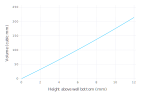

In [16]:
plot(x=H,y=polyval(pvol,H),Geom.line,
Guide.XLabel("Height above well bottom (mm)"),
Guide.YLabel("Volume (cubic mm)"))

In [17]:
real(roots(pvol - 50.)[1])

-156.37132054994754

In [18]:
real(roots(pvol - 100.)[1])

-157.81466509468657

In [19]:
real(roots(pvol - 150.)[1])

-159.18546710697348

As a table

In [21]:
H = 0.0:0.1:12.0;
[H polyval(pvol,H)]

121×2 Array{Float64,2}:
  0.0    0.0    
  0.1    1.59197
  0.2    3.18703
  0.3    4.78517
  0.4    6.38641
  0.5    7.99074
  0.6    9.59816
  0.7   11.2087 
  0.8   12.8223 
  0.9   14.439  
  1.0   16.0589 
  1.1   17.6818 
  1.2   19.3079 
  ⋮             
 10.9  192.306  
 11.0  194.252  
 11.1  196.201  
 11.2  198.153  
 11.3  200.109  
 11.4  202.069  
 11.5  204.032  
 11.6  205.998  
 11.7  207.967  
 11.8  209.941  
 11.9  211.917  
 12.0  213.897  